## Question 2


In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [115]:
# parameters for figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [16]:
filename1 = "file1.csv"
filename2 = "file2.csv"
filename3 = "file3.csv"
filename4 = "file4.csv"

In [78]:
# you can remove the sep argument if the column headers in the csv do not contain any whitespace (remove comment)
df1 = pd.read_csv(filename1, sep=r'\s*,\s*')
df2 = pd.read_csv(filename2, sep=r'\s*,\s*')
df3 = pd.read_csv(filename3, sep=r'\s*,\s*')
df4 = pd.read_csv(filename4, sep=r'\s*,\s*')

C:\Users\risha\Anaconda3\envs\Rishabh\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\risha\Anaconda3\envs\Rishabh\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\risha\Anaconda3\envs\Rishabh\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid

In [73]:
colname=['X', 'Y']
df = [df1, df2, df3, df4]

### 2.a Distrbution of input data

In [37]:
df1.describe()

,X,Y
count,50.000000,50.000000
mean,0.009289,-0.046345
std,0.580269,0.595805
min,-0.976960,-0.932282
25%,-0.542463,-0.675997
50%,0.027369,0.032535
75%,0.477639,0.498149
max,0.994825,0.854370


In [39]:
df2.describe()

,X,Y
count,50.000000,50.000000
mean,0.150173,0.059121
std,0.611077,0.564031
min,-0.980530,-0.884154
25%,-0.299698,-0.357892
50%,0.207455,0.088161
75%,0.674110,0.580068
max,0.992106,0.998276


In [40]:
df3.describe()

,X,Y
count,50.000000,50.000000
mean,0.131320,0.083010
std,0.575613,0.614692
min,-0.928101,-0.956008
25%,-0.408692,-0.488705
50%,0.306571,0.242099
75%,0.561377,0.550439
max,0.977606,0.983001


In [41]:
df4.describe()

,X,Y
count,50.000000,50.000000
mean,-0.042690,0.136208
std,0.641345,0.587312
min,-0.998101,-0.962908
25%,-0.656796,-0.309385
50%,-0.046271,0.102811
75%,0.503915,0.701346
max,0.988984,0.996756


In [51]:
df2.head()

,X,Y
0,-0.384279,-0.148806
1,-0.976111,0.327148
2,0.046245,-0.698198
3,-0.042866,-0.721241
4,-0.225268,-0.327255


[]

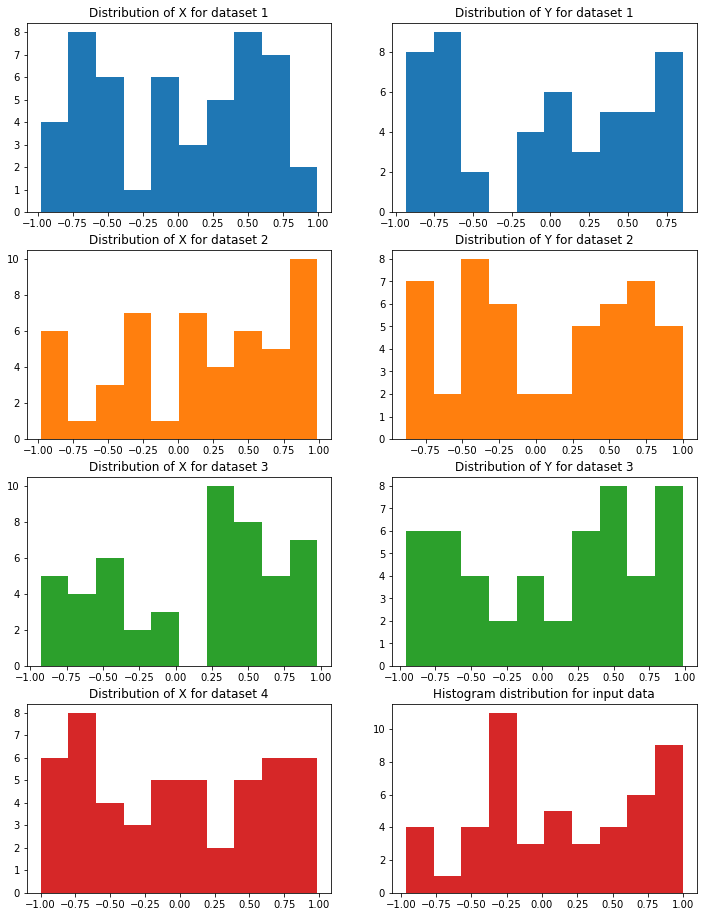

In [76]:
fig, ax = plt.subplots(4, 2, figsize=(12,16))
for i in range(4):
    ax[i][0].hist(df[i][colname[0]], facecolor="C%i"%(i))
    ax[i][0].set_title('Distribution of %s for dataset %i'%(colname[0], i+1))
    ax[i][1].hist(df[i][colname[1]], facecolor="C%i"%(i))
    ax[i][1].set_title('Distribution of %s for dataset %i'%(colname[1], i+1))
plt.plot()


--->You can explain if you can see any trend in the distribution.

## 2.b Correlations among input fields

I dont know exactly how to plot that correlation thingy. SO i will leave this blank for now

## 2.c Clustering

In [117]:
markers = ['s', 'o', 'v', 'x', '+', 'd', '^']

In [104]:
cluster_count = 4
km = KMeans(
    n_clusters=cluster_count, init='random',
    n_init=10, max_iter=100,
    tol=1e-4, random_state=0
)

In [129]:
# to use all data
# input_df = pd.concat([df[0], df[1], df[2], df[3]])

# to use first csv
input_df = df[0]

In [130]:
input_data = input_df.to_numpy() 
pred_km = km.fit_predict(input_data)

In [131]:
print("Clusters Listed for first 10 datapoints")
print("%s\t\t %s\t\t Cluster_ID"%(colname[0], colname[1]))
for i in range(min(10, len(pred_km))):
    print("%f\t %f\t %i"%(input_data[i][0],input_data[i][1],pred_km[i]))

Clusters Listed for first 10 datapoints
X		 Y		 Cluster_ID
0.578258	 0.197591	 2
-0.187925	 -0.125681	 3
-0.051914	 -0.637648	 3
-0.760080	 0.797171	 1
-0.584337	 0.638760	 1
0.304853	 0.048412	 2
0.994825	 -0.852412	 0
0.568807	 0.017870	 2
-0.650451	 -0.679453	 3
-0.323698	 -0.597586	 3


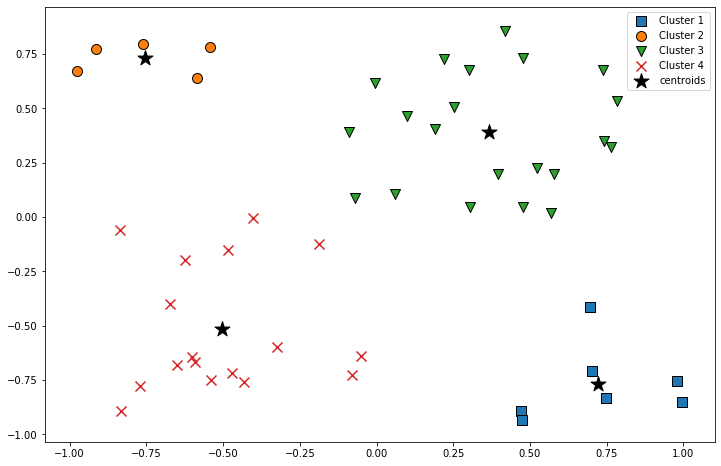

In [132]:
for i in range(cluster_count):
    plt.scatter(
        input_data[pred_km == i, 0], input_data[pred_km == i, 1], 
        color="C%i"%(i), label="Cluster %i"%(i+1), s=100,
        marker = markers[i], edgecolor="black"
    )
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
plt.legend()
plt.show()

## 2.d Comments from above excercise 

You can add your comments based on the results.